<a href="https://colab.research.google.com/github/AswinManohar/Satellite-data-analytics/blob/main/Hyperspectral_image_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Hyperpectral image analysis of satellite data**

In [ ]:
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat


#Download sample data from the Remote sensing data Laboratory : https://rslab.ut.ac.ir/data 

--2021-03-27 11:20:57--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat.1’

PaviaU.mat.1        100%[===================>]  33.19M   702KB/s    in 48s     

2021-03-27 11:21:45 (712 KB/s) - ‘PaviaU.mat.1’ saved [34806917/34806917]

--2021-03-27 11:21:45--  http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11005 (11K)
Saving to: ‘PaviaU_gt.mat.1’

PaviaU_gt.mat.1     100%[===================>]  10.75K  --.-KB/s    in 0s      

2021-03-27 11:21:46 (240 MB/s) - ‘PaviaU_gt.mat.1’ saved [11005/11005]

FINISHED --2021-03-27 11:21:46--
Total wall clock time: 48s
Downloaded: 2 files, 33M in 48s (712 KB/s)


In [68]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd



In [69]:
#Read data and get it's shape
def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


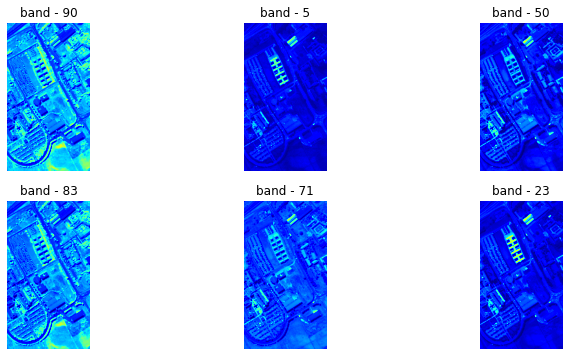

In [70]:
sns.axes_style('whitegrid')
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='jet')
    plt.axis('off')
    plt.title(f'band - {q}')

In [71]:
def get_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('hsi_dataset.csv')
  return df 
df = get_pixels(X, y)

In [72]:
# Visualizing the Ground truth of the HSI

cls = px.imshow(y, color_continuous_scale='jet',)
                
cls.update_layout(title = 'Gound Trurh', coloraxis_showscale=False)
cls.update_xaxes(showticklabels=False)
cls.update_yaxes(showticklabels=False)
cls.show()

In [73]:
#to display the statistics of all present spectral bands in the image
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band64,band65,band66,band67,band68,band69,band70,band71,band72,band73,band74,band75,band76,band77,band78,band79,band80,band81,band82,band83,band84,band85,band86,band87,band88,band89,band90,band91,band92,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.00000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,838.761900,833.532261,833.957903,840.022734,846.49027,849.024166,858.274605,869.041553,879.729687,893.426895,909.047888,929.773245,950.449826,971.719296,999.330747,1030.487247,1047.342570,1056.144036,1064.008298,1078.164397,1094.337912,1102.542194,1106.111823,1112.674807,1116.410511,1117.368182,1116.463134,1115.816958,1115.709667,1116.513134,...,1151.786355,1167.364634,1196.965762,1242.671355,1300.318158,1374.747102,1451.015511,1524.074653,1596.037252,1671.897768,1753.491707,1835.790125,1922.294619,1996.554687,2063.378761,2114.096861,2155.272912,2194.415844,2216.565135,2212.345323,2193.142758,2210.446374,2232.427758,2245.315858,2245.806716,2246.235497,2253.048669,2267.367917,2265.880313,2257.890217,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,654.150867,663.504620,675.055950,685.877447,694.17722,700.069128,706.904269,710.988908,712.225631,712.766144,711.116605,707.754548,702.056494,696.329369,694.323524,695.658318,691.457118,685.112863,680.143249,679.484331,680.548766,678.991678,678.109958,681.818279,686.403595,691.668118,696.466303,700.002590,701.182840,700.248079,...,736.586216,724.016756,708.647458,695.452171,674.953291,653.314752,632.543791,615.486140,603.333136,597.054264,605.347893,629.388781,667.016967,708.788296,750.020598,785.134096,814.465202,840.078731,856.606082,852.494726,820.735878,830.340437,856.128856,869.604098,871.258687,870.414926,870.642830,872.611679,868.905723,863.646853,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,26.000000,37.000000,41.000000,59.000000,71.000000,72.0000

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,4)]+['class']

In [75]:
q.head()

,PC-1,PC-2,PC-3,class
0,-5150.190044,6795.052770,1532.351461,0
1,-6082.245760,3158.592195,1463.194744,0
2,-7214.505405,1158.875812,1400.817899,0
3,-6566.279360,3398.894763,1126.024772,0
4,-6496.967970,2154.797771,1035.954575,0


In [76]:
# saving to .csv
q.to_csv('paviaU_3.csv', index=False)

In [77]:
qq = q[q['class'] != 0]
qq['class'].value_counts()

2    18649
1     6631
6     5029
8     3682
4     3064
3     2099
5     1345
7     1330
9      947
Name: class, dtype: int64

In [78]:
class_labels = {'1': 'Asphalt'	,
'2'	:'Meadows'	,
'3'	:'Gravel'	,
'4'	:'Trees'	,
'5'	:'Painted metal sheets'	,
'6'	: 'Bare Soil'	,
'7'	:'Bitumen'	,
'8'	:'Self Blocking Bricks'	,
'9'	:'Shadows'}



In [79]:
qq['label'] =  qq['class'].apply(lambda x : class_labels[str(x)])
qq['label'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Meadows                 18649
Asphalt                  6631
Bare Soil                5029
Self Blocking Bricks     3682
Trees                    3064
Gravel                   2099
Painted metal sheets     1345
Bitumen                  1330
Shadows                   947
Name: label, dtype: int64

In [80]:
import plotly.express as px
count = qq['class'].value_counts()
bar_fig = px.bar(x = count.index[1:], y = count[1:], labels= class_labels, color = count.index[1:] )
bar_fig.update_layout(
    xaxis = dict(
        title='Class',
        tickmode = 'array',
        tickvals = count.index[1:].tolist(),
        
        tickangle = 45
    ),
    yaxis = dict(
        title='count',
      ),
      showlegend=False
)
bar_fig.show()

In [81]:
# sampling dataset
sample_size = 200
sample = qq.groupby('class').apply(lambda x: x.sample(sample_size))
sample.head()

PC-1         PC-2        PC-3  class    label
class                                                             
1     130552 -1135.100572 -5314.465391  351.702891      1  Asphalt
      163723 -4242.960793 -5890.760672  382.774797      1  Asphalt
      49326   1299.082547 -4572.947133  160.883789      1  Asphalt
      106496 -1059.460280 -5096.129646  231.437498      1  Asphalt
      148909  3021.885131 -2135.106186 -993.272149      1  Asphalt

In [84]:
import chart_studio.plotly as py
import plotly.offline as py

In [85]:
scatter_3d = px.scatter_3d(sample, x="PC-1", y="PC-2", z="PC-3", color="label", size="class", hover_name="label",
                  symbol="label")#, color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
scatter_3d.show()
py.plot(scatter_3d, filename = 'scatter_3d', auto_open=True)

/usr/local/lib/python3.7/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `scatter_3d` didn't end with .html. Adding .html to the end of your file.



'scatter_3d.html'

In [86]:
area_plt1 = px.area(sample, x="PC-1", y="PC-2", color="label", line_group="label")
area_plt1.show()
py.plot(area_plt1, filename = 'area_plt1', auto_open=True)

/usr/local/lib/python3.7/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `area_plt1` didn't end with .html. Adding .html to the end of your file.



'area_plt1.html'

In [83]:
area_plt2 = px.area(sample, x="PC-1", y="PC-3", color="label", line_group="label")
area_plt2.show()
py.plot(area_plt2, filename = 'area_plt2', auto_open=True)

PlotlyRequestError: ignored

In [87]:
area_plt3 = px.area(sample, x="PC-2", y="PC-3", color="label", line_group="label")
area_plt3.show()
py.plot(area_plt3, filename = 'area_plt2', auto_open=True)

/usr/local/lib/python3.7/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `area_plt2` didn't end with .html. Adding .html to the end of your file.



'area_plt2.html'

In [88]:
pair = px.scatter_matrix(sample, dimensions=["PC-1", "PC-2", "PC-3"], color="label")
pair.show()
py.plot(pair, filename = 'pair_plot_pc', auto_open=True)

/usr/local/lib/python3.7/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `pair_plot_pc` didn't end with .html. Adding .html to the end of your file.



'pair_plot_pc.html'

In [89]:
fig = px.scatter(sample, x="PC-1", y="PC-2", size="class", color="label",
           hover_name="label", log_x=True, size_max=12)
fig.show()

In [90]:
# Box Plot
fig = fig = px.violin(sample, y="PC-1", x="PC-2", color="label", box=True, points="all", hover_data=['PC-1', 'PC-2', 'PC-3','label'])
fig.show()

In [91]:

line = px.line_3d(sample, x="PC-1", y="PC-2", z="PC-3", color="label", line_dash="label")
line.show()
py.plot(line, filename = '3D_Scatter_line_Plot', auto_open=True)

/usr/local/lib/python3.7/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `3D_Scatter_line_Plot` didn't end with .html. Adding .html to the end of your file.



'3D_Scatter_line_Plot.html'